In [1]:
# import all the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
import h5py

! pip install xlrd

C:\Users\AERO15\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AERO15\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AERO15\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AERO15\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\

In [2]:
all_df = pd.read_excel('trainDataset.xls', index_col=False)

all_df = all_df.drop('ID', axis=1)

invalid = []

for index, row in all_df.iterrows():
    for key in row.keys():
        if row[key] == 999:
            invalid.append(index)

all_df = all_df.drop(index = invalid)
all_df = all_df.drop('pCR (outcome)', axis=1)

all_df

,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,144.000000,41.0,0,0,0,1,3,3,1,1,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,142.000000,39.0,1,1,0,0,3,3,1,1,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,135.000000,31.0,0,0,0,1,2,1,1,0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,12.000000,35.0,0,0,0,1,3,3,1,1,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,109.000000,61.0,1,0,0,0,2,1,1,0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,49.250000,46.1,0,0,0,1,3,3,1,1,...,0.439568,0.439568,3.056046,0.001339,1.671271e+07,79.989003,0.003282,0.024716,0.000812,0.003078
396,48.500000,53.3,0,0,0,1,2,1,1,0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
397,47.500000,68.8,1,0,0,0,3,3,1,1,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368
398,46.916667,46.0,1,0,0,0,2,1,1,1,...,0.670229,0.670229,1.857045,0.006706,5.609262e+05,9.609163,0.026591,0.018682,0.000311,0.022676


['ER', 'PgR', 'TrippleNegative', 'HistologyType', 'LNStatus', 'original_shape_SurfaceVolumeRatio', 'original_firstorder_Skewness', 'original_glcm_Autocorrelation', 'original_glcm_Correlation', 'original_glcm_JointAverage', 'original_glcm_MCC', 'original_glcm_SumAverage', 'original_gldm_DependenceVariance', 'original_gldm_HighGrayLevelEmphasis', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_gldm_LowGrayLevelEmphasis', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis', 'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_Siz

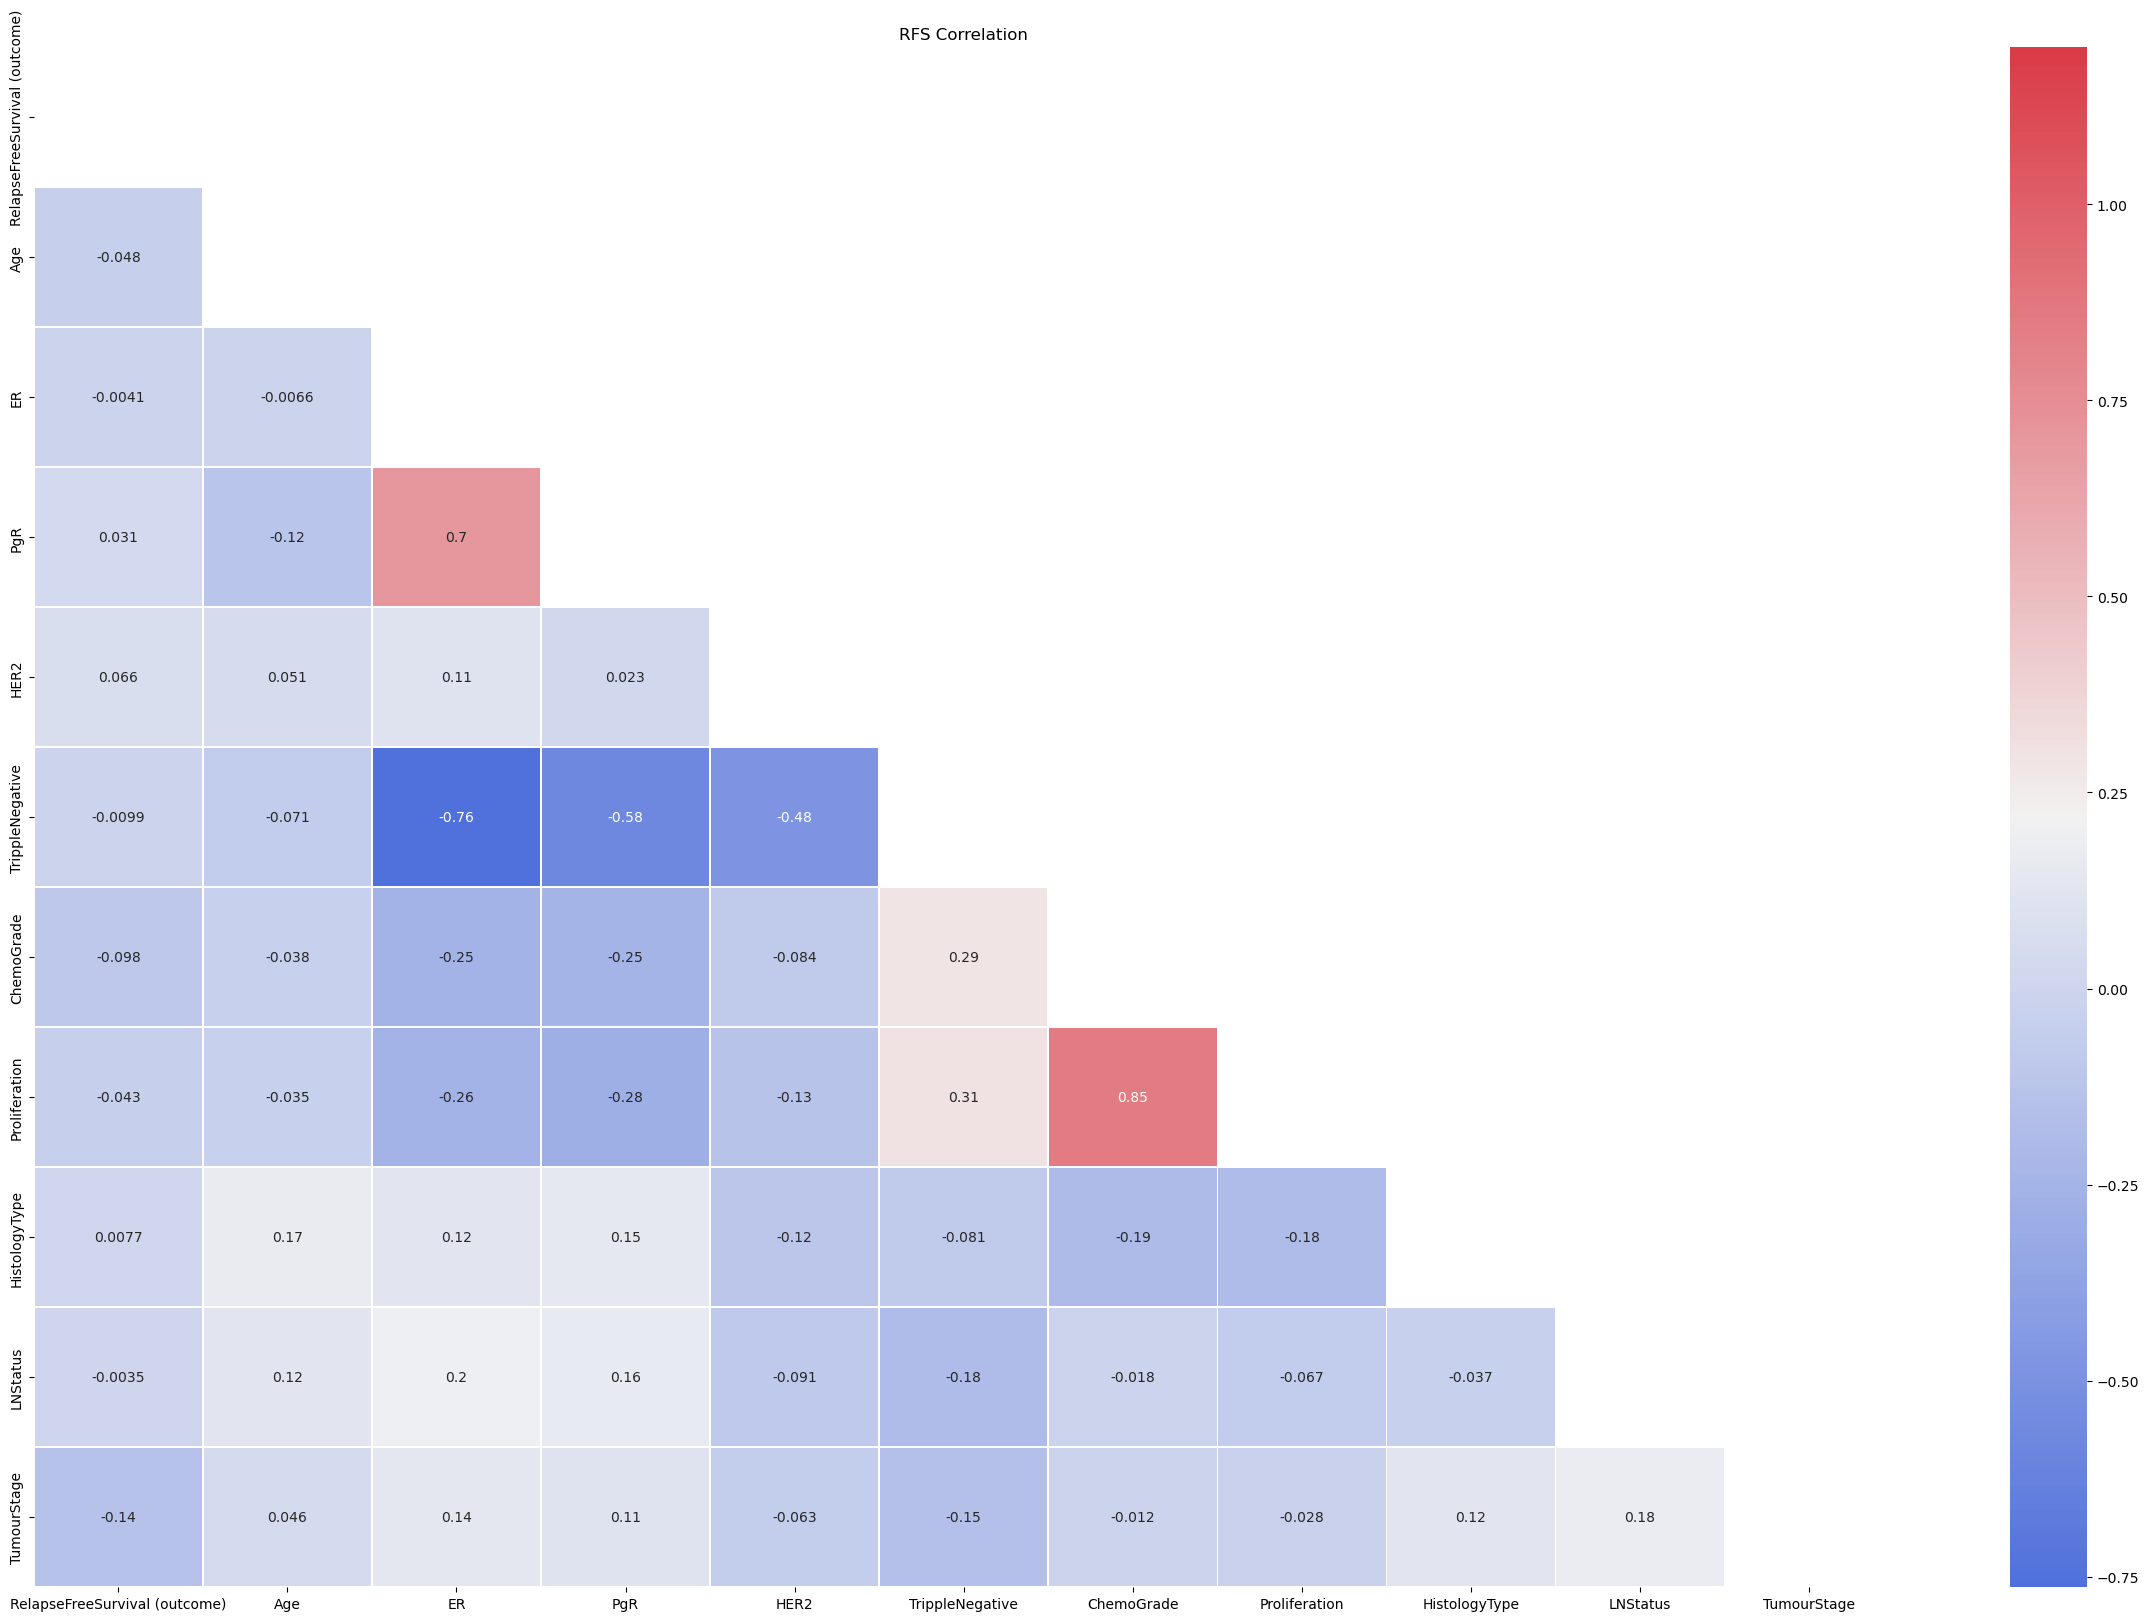

In [3]:
corrMatt = all_df.iloc[:,0:11].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 20))
plt.title('RFS Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=0.5);

wholeCorrMatt = all_df.corr()

weak = []

for index, row in wholeCorrMatt.iterrows():
    if abs(row['RelapseFreeSurvival (outcome)']) < 0.035:
        weak.append(index)

all_df = all_df.drop(columns=weak,axis=1)

print(weak)

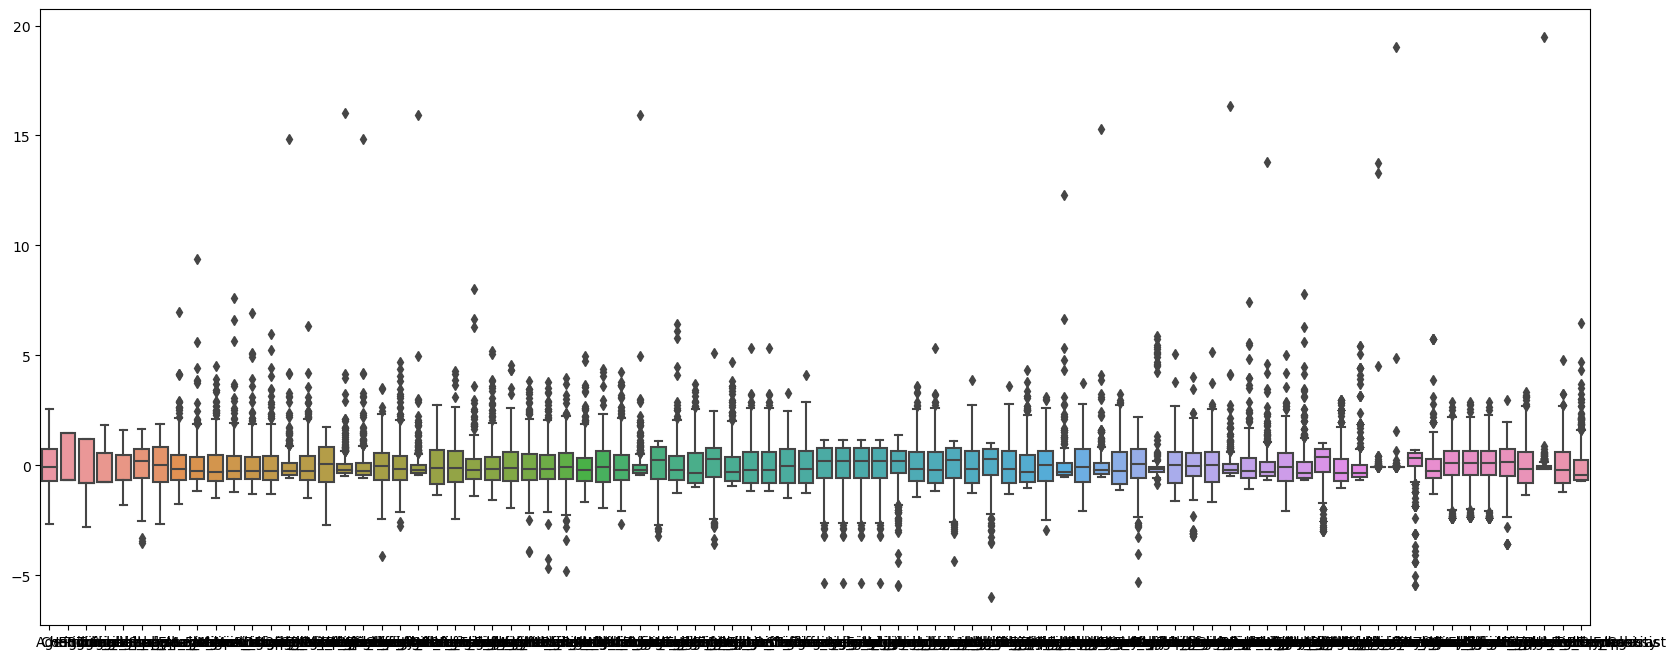

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_df.iloc[:,1:] = scaler.fit_transform(all_df.iloc[:,1:])
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:,1:],ax=ax)

In [55]:
from collections import Counter

def detect_outliers(df, n, features):

    outlier_indices = []
    for col in features:
        # The first quartile
        Q1 = np.percentile(df[col], 25)
        # The third quartile
        Q3 = np.percentile(df[col], 75)
        
        IQR = Q3 - Q1 
        
        lower_limit = Q1 - 1.5 * IQR  # lower boundary
        upper_limit = Q3 + 1.5 * IQR  # upper boundary
        
        outlier_list_col = df[(df[col]<lower_limit) | (df[col] > upper_limit)].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)

    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

rows = detect_outliers(all_df,1,all_df.iloc[:,1:])

# delete the outliers
all_df = all_df.drop(index=rows, axis=0)

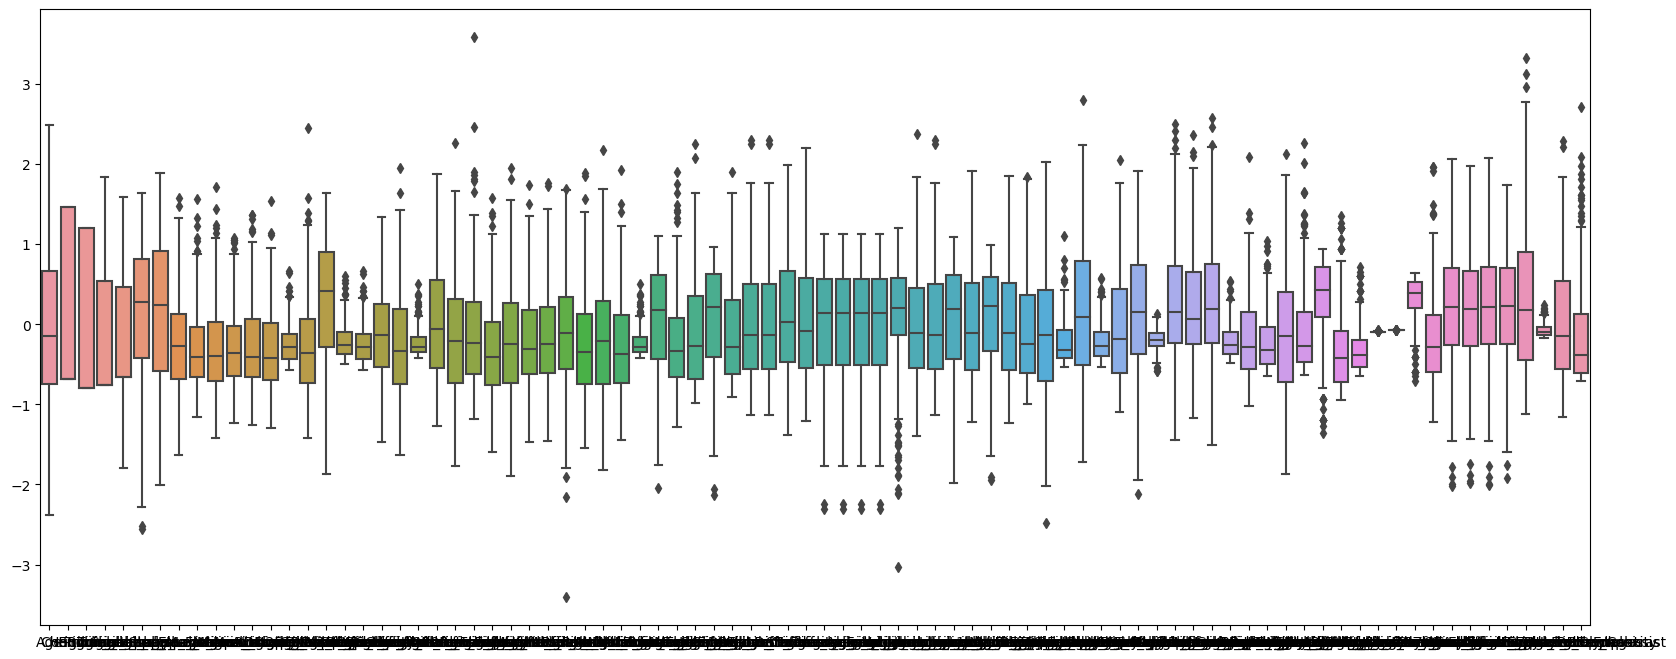

In [56]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:,1:],ax=ax)

### SVM

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

features = all_df.iloc[:,1:]
rFS = all_df["RelapseFreeSurvival (outcome)"]
svm = SVR(kernel="rbf", gamma='auto')

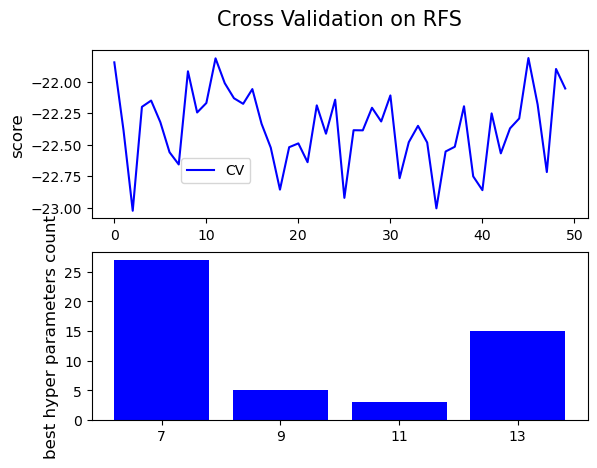

In [58]:
NUM_TRIALS = 50
X = features
y = rFS

# Set up possible values of parameters to optimize over
p_grid = {"C": [7,9,11,13]}

scores = np.zeros(NUM_TRIALS)
params = []

for i in range(NUM_TRIALS):

    cv = KFold(n_splits=5, shuffle=True, random_state=i)
    
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=cv, scoring='neg_mean_absolute_error')
    clf.fit(X,y)
    scores[i] = clf.best_score_
    params.append(clf.best_params_)


best_hyper_params_count = np.zeros(4)
for i in params:
    if params.count(i) >= 1:
        best_hyper_params_count[int((i["C"]-7)/2)] = params.count(i)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(line,) = plt.plot(scores, color="b")
plt.ylabel("score", fontsize="12")
plt.legend(
    [line],
    ["CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Cross Validation on RFS",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.subplot(212)

plt.bar(range(len(best_hyper_params_count)), best_hyper_params_count,fc='b', tick_label=[7,9,11,13])
plt.ylabel("best hyper parameters count", fontsize="12")
plt.show()

In [59]:
svm = SVR(C = 7,kernel="rbf", gamma='auto')
cv_error_array = cross_val_score(svm, features, rFS,scoring='neg_mean_absolute_error') * (-1)
average = np.average(cv_error_array)
print('The {}-fold cross-validation MAE score for this method is {:.2f}'.format(5, average))

The 5-fold cross-validation MAE score for this method is 24.59


### Random Forest

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = all_df.iloc[:,1:]
RFS = all_df["RelapseFreeSurvival (outcome)"]

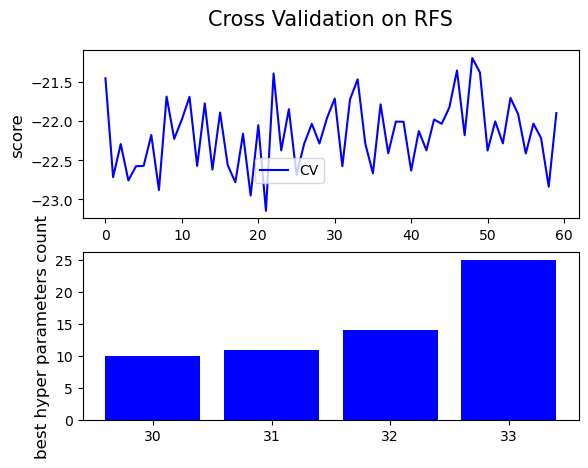

In [61]:
NUM_TRIALS = 60
X = features
y = RFS

rf_model = RandomForestRegressor(random_state=66)
n_estimators_grid = {"n_estimators": [30,31,32,33]}
scores = np.zeros(NUM_TRIALS)
params = []

for i in range(NUM_TRIALS):

    cv = KFold(n_splits=5, shuffle=True, random_state=i)

    reg = GridSearchCV(estimator=rf_model, param_grid=n_estimators_grid, cv=cv, scoring='neg_mean_absolute_error')
    reg.fit(X,y)
    scores[i] = reg.best_score_
    params.append(reg.best_params_)

best_hyper_params_count = np.zeros(4)
for i in params:
    if params.count(i) >= 1:
        best_hyper_params_count[int(i["n_estimators"]-30)] = params.count(i)

# Plot scores on each trial for CV
plt.figure()
plt.subplot(211)
(line,) = plt.plot(scores, color="b")
plt.ylabel("score", fontsize="12")
plt.legend(
    [line],
    ["CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Cross Validation on RFS",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.subplot(212)

plt.bar(range(len(best_hyper_params_count)), best_hyper_params_count,fc='b', tick_label=[30,31,32,33])
plt.ylabel("best hyper parameters count", fontsize="12")
plt.show()


In [62]:
rf_model = RandomForestRegressor(n_estimators=33, random_state=66)
X_train, X_test, y_train, y_test = train_test_split(features, RFS, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

from sklearn import metrics
print('MAE: {}'.format(metrics.mean_absolute_error(pred,y_test)))

MAE: 23.11053240740741


### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import KFold

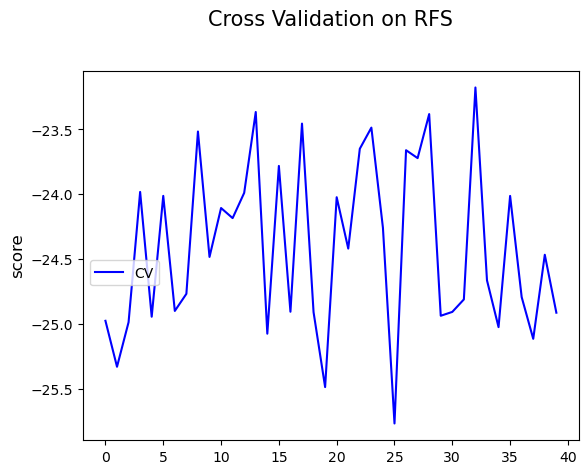

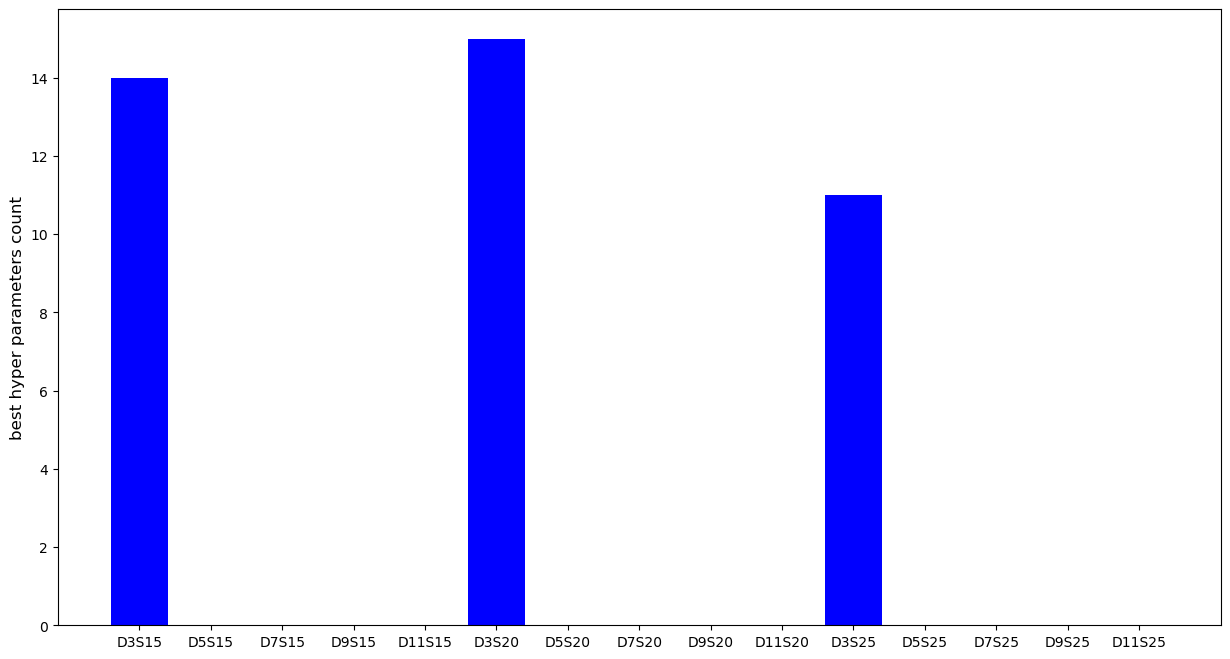

In [64]:
tree_dtr = tree.DecisionTreeRegressor()

X = features            
y = RFS            

NUM_TRIALS = 40
p_grid = {'max_depth': [3, 5, 7, 9, 11], 'min_samples_split':[15,20,25]}
scores = np.zeros(NUM_TRIALS)
params = []
for i in range(NUM_TRIALS):

    cv = KFold(n_splits=5, shuffle=True, random_state=i)

    dtr = GridSearchCV(estimator=tree_dtr, param_grid=p_grid, cv=cv, scoring='neg_mean_absolute_error')
    dtr.fit(X,y)
    scores[i] = dtr.best_score_
    params.append(dtr.best_params_)
    best_hyper_params_count = [[0 for i in range(5)] for j in range(3)]
for i in params:
    best_hyper_params_count[int (i['min_samples_split']/5-3)][int((i['max_depth']-3)/2)] = params.count(i)
    
# Plot scores on each trial for nested and non-nested CV
plt.figure()
(line,) = plt.plot(scores, color="b")
plt.ylabel("score", fontsize="12")
plt.legend(
    [line],
    ["CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Cross Validation on RFS",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.show()

plt.figure(figsize = (15,8))

whole_list = best_hyper_params_count[0] + best_hyper_params_count[1] + best_hyper_params_count[2]

lang = []


for j in range(15,30,5):
    for i in range(3,13,2):
        lang.append('D' + str(i) + 'S' + str(j))       

plt.bar(range(len(whole_list)), whole_list, fc='b', tick_label=lang)

plt.ylabel("best hyper parameters count", fontsize="12")

plt.show()



In [65]:
print(X.shape)

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2,random_state=30)

print(train_X.shape,test_X.shape)
tree_dtr  =DecisionTreeRegressor(max_depth=3, min_samples_split =25)

tree_dtr.fit(train_X,train_Y)

predict_test_y = tree_dtr.predict(test_X)
 

from sklearn import metrics
print('MAE:{}'.format(metrics.mean_absolute_error(predict_test_y,test_Y)))


(236, 84)
(188, 84) (48, 84)
MAE:24.34548611111111


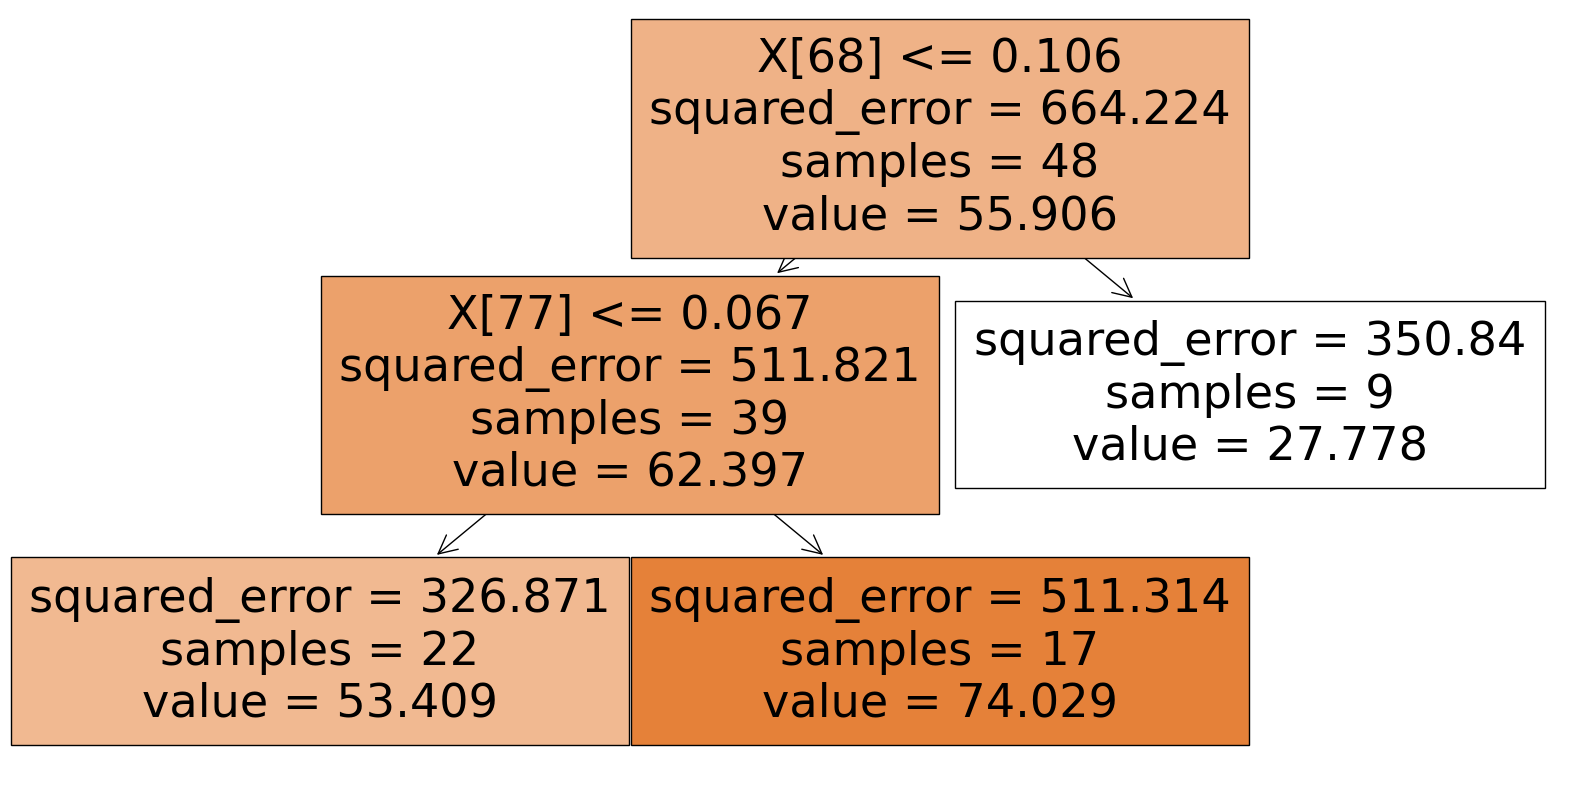

In [66]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,10))
plot_tree(tree_dtr.fit(test_X,test_Y), filled=True,max_depth=3)
plt.show()

### ANN

In [67]:
from tensorflow.keras.optimizers import SGD
from tensorflow import keras

In [68]:

model_one_layer_1=keras.models.Sequential()
model_one_layer_1.add(keras.layers.Dense(32, input_shape=(all_df.iloc[:,1:].shape[1],), activation="relu"))
model_one_layer_1.add(keras.layers.Dense(1, activation='linear'))

model_one_layer_2=keras.models.Sequential()
model_one_layer_2.add(keras.layers.Dense(32, input_shape=(all_df.iloc[:,1:].shape[1],), activation="relu"))
model_one_layer_2.add(keras.layers.Dense(1, activation='linear'))

model_one_layer_3=keras.models.Sequential()
model_one_layer_3.add(keras.layers.Dense(32, input_shape=(all_df.iloc[:,1:].shape[1],), activation="relu"))
model_one_layer_3.add(keras.layers.Dense(1, activation='linear'))

model_one_layer_1.compile(loss='mean_absolute_error', optimizer=SGD(learning_rate=0.001),metrics=[keras.metrics.MeanAbsoluteError()])
model_one_layer_2.compile(loss='mean_absolute_error', optimizer=SGD(learning_rate=0.0001),metrics=[keras.metrics.MeanAbsoluteError()])
model_one_layer_3.compile(loss='mean_absolute_error', optimizer=SGD(learning_rate=0.00001),metrics=[keras.metrics.MeanAbsoluteError()])

In [69]:
from sklearn.model_selection import KFold
import os
import h5py

def train_ann(features, target, model, name):
    root_logdir = os.path.join(os.curdir, "my_logs")
    def get_run_logdir():
         import time
         run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
         return os.path.join(root_logdir, run_id)

    run_logdir = get_run_logdir()
    kf = KFold(n_splits=5)
    k=1
    
    all_score = []

    for train_index, test_index in kf.split(features):
        print("fold",k)
        # Split the data
        X_train, X_test = np.array(features)[train_index], np.array(features)[test_index]
        y_train, y_test = np.array(target)[train_index], np.array(target)[test_index]
        
        tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
        early_stopping = keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=3)
        # training and validation
        model.fit(np.array(X_train), np.array(y_train), epochs=300, validation_data=(np.array(X_test), np.array(y_test)),callbacks=[tensorboard_cb, early_stopping])

        #save the model of each fold
        model.save(os.path.join('./regression_models/fold_{}_{}.hdf5'.format(k, name)))

        # evaluate the accuracy of each fold
        scores = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
        print("{}: {}".format(model.metrics_names[1], scores[1]))
        
        k = k+1
    
        all_score.append(scores[1])
    
    return all_score

ann = []
ann.append(train_ann(features=all_df.iloc[:,1:], target=all_df['RelapseFreeSurvival (outcome)'], model=model_one_layer_1, name="model_one_layer_1"))
ann.append(train_ann(features=all_df.iloc[:,1:], target=all_df['RelapseFreeSurvival (outcome)'], model=model_one_layer_2, name="model_one_layer_2"))
ann.append(train_ann(features=all_df.iloc[:,1:], target=all_df['RelapseFreeSurvival (outcome)'], model=model_one_layer_3, name="model_one_layer_3"))

fold 1
Train on 188 samples, validate on 48 samples
Epoch 1/300
188/188 [==============================] - 0s 841us/sample - loss: 51.1912 - mean_absolute_error: 51.1912 - val_loss: 80.0647 - val_mean_absolute_error: 80.0647
Epoch 2/300
188/188 [==============================] - 0s 52us/sample - loss: 51.1380 - mean_absolute_error: 51.1380 - val_loss: 80.0163 - val_mean_absolute_error: 80.0163
Epoch 3/300
188/188 [==============================] - 0s 73us/sample - loss: 51.0847 - mean_absolute_error: 51.0847 - val_loss: 79.9679 - val_mean_absolute_error: 79.9679
Epoch 4/300
188/188 [==============================] - 0s 83us/sample - loss: 51.0317 - mean_absolute_error: 51.0317 - val_loss: 79.9197 - val_mean_absolute_error: 79.9197
Epoch 5/300
188/188 [==============================] - 0s 52us/sample - loss: 50.9788 - mean_absolute_error: 50.9788 - val_loss: 79.8713 - val_mean_absolute_error: 79.8713
Epoch 6/300
188/188 [==============================] - 0s 73us/sample - loss: 50.9263 -

188/188 [==============================] - 0s 42us/sample - loss: 42.9469 - mean_absolute_error: 42.9469 - val_loss: 72.5294 - val_mean_absolute_error: 72.5294
Epoch 96/300
188/188 [==============================] - 0s 47us/sample - loss: 42.7815 - mean_absolute_error: 42.7815 - val_loss: 72.3716 - val_mean_absolute_error: 72.3716
Epoch 97/300
188/188 [==============================] - 0s 42us/sample - loss: 42.6129 - mean_absolute_error: 42.6129 - val_loss: 72.2121 - val_mean_absolute_error: 72.2121
Epoch 98/300
188/188 [==============================] - 0s 47us/sample - loss: 42.4413 - mean_absolute_error: 42.4413 - val_loss: 72.0491 - val_mean_absolute_error: 72.0491
Epoch 99/300
188/188 [==============================] - 0s 47us/sample - loss: 42.2652 - mean_absolute_error: 42.2652 - val_loss: 71.8833 - val_mean_absolute_error: 71.8833
Epoch 100/300
188/188 [==============================] - 0s 42us/sample - loss: 42.0868 - mean_absolute_error: 42.0868 - val_loss: 71.7141 - val_mea

188/188 [==============================] - 0s 47us/sample - loss: 20.4614 - mean_absolute_error: 20.4614 - val_loss: 52.5219 - val_mean_absolute_error: 52.5219
Epoch 190/300
188/188 [==============================] - 0s 47us/sample - loss: 20.3572 - mean_absolute_error: 20.3572 - val_loss: 52.3387 - val_mean_absolute_error: 52.3387
Epoch 191/300
188/188 [==============================] - 0s 42us/sample - loss: 20.2521 - mean_absolute_error: 20.2521 - val_loss: 52.1572 - val_mean_absolute_error: 52.1572
Epoch 192/300
188/188 [==============================] - 0s 42us/sample - loss: 20.1512 - mean_absolute_error: 20.1512 - val_loss: 51.9729 - val_mean_absolute_error: 51.9729
Epoch 193/300
188/188 [==============================] - 0s 47us/sample - loss: 20.0524 - mean_absolute_error: 20.0524 - val_loss: 51.7873 - val_mean_absolute_error: 51.7873
Epoch 194/300
188/188 [==============================] - 0s 47us/sample - loss: 19.9506 - mean_absolute_error: 19.9506 - val_loss: 51.5950 - val

188/188 [==============================] - 0s 47us/sample - loss: 17.4710 - mean_absolute_error: 17.4710 - val_loss: 45.7258 - val_mean_absolute_error: 45.7258
Epoch 284/300
188/188 [==============================] - 0s 52us/sample - loss: 17.4560 - mean_absolute_error: 17.4560 - val_loss: 45.7181 - val_mean_absolute_error: 45.7181
Epoch 285/300
188/188 [==============================] - 0s 67us/sample - loss: 17.4493 - mean_absolute_error: 17.4493 - val_loss: 45.7039 - val_mean_absolute_error: 45.7039
Epoch 286/300
188/188 [==============================] - 0s 67us/sample - loss: 17.4491 - mean_absolute_error: 17.4491 - val_loss: 45.7002 - val_mean_absolute_error: 45.7002
Epoch 287/300
188/188 [==============================] - 0s 67us/sample - loss: 17.4275 - mean_absolute_error: 17.4275 - val_loss: 45.6897 - val_mean_absolute_error: 45.6897
Epoch 288/300
188/188 [==============================] - 0s 57us/sample - loss: 17.4203 - mean_absolute_error: 17.4203 - val_loss: 45.6830 - val

Epoch 30/300
189/189 [==============================] - 0s 41us/sample - loss: 22.7903 - mean_absolute_error: 22.7903 - val_loss: 22.0982 - val_mean_absolute_error: 22.0982
Epoch 31/300
189/189 [==============================] - 0s 36us/sample - loss: 22.7823 - mean_absolute_error: 22.7823 - val_loss: 22.0706 - val_mean_absolute_error: 22.0706
Epoch 32/300
189/189 [==============================] - 0s 41us/sample - loss: 22.7698 - mean_absolute_error: 22.7698 - val_loss: 22.0550 - val_mean_absolute_error: 22.0550
Epoch 33/300
189/189 [==============================] - 0s 41us/sample - loss: 22.7595 - mean_absolute_error: 22.7595 - val_loss: 22.0375 - val_mean_absolute_error: 22.0375
Epoch 34/300
189/189 [==============================] - 0s 36us/sample - loss: 22.7481 - mean_absolute_error: 22.7481 - val_loss: 22.0283 - val_mean_absolute_error: 22.0283
Epoch 35/300
189/189 [==============================] - 0s 41us/sample - loss: 22.7353 - mean_absolute_error: 22.7353 - val_loss: 22.01

189/189 [==============================] - 0s 36us/sample - loss: 22.9732 - mean_absolute_error: 22.9732 - val_loss: 17.2555 - val_mean_absolute_error: 17.2555
Epoch 4/300
189/189 [==============================] - 0s 46us/sample - loss: 22.9231 - mean_absolute_error: 22.9231 - val_loss: 17.4266 - val_mean_absolute_error: 17.4266
mean_absolute_error: 17.42656898498535
fold 5
Train on 189 samples, validate on 47 samples
Epoch 1/300
189/189 [==============================] - 0s 62us/sample - loss: 23.4983 - mean_absolute_error: 23.4983 - val_loss: 14.9579 - val_mean_absolute_error: 14.9579
Epoch 2/300
189/189 [==============================] - 0s 46us/sample - loss: 23.4615 - mean_absolute_error: 23.4614 - val_loss: 15.0036 - val_mean_absolute_error: 15.0036
Epoch 3/300
189/189 [==============================] - 0s 36us/sample - loss: 23.4476 - mean_absolute_error: 23.4476 - val_loss: 15.0493 - val_mean_absolute_error: 15.0493
Epoch 4/300
189/189 [==============================] - 0s 46u

188/188 [==============================] - 0s 78us/sample - loss: 50.9200 - mean_absolute_error: 50.9200 - val_loss: 80.1984 - val_mean_absolute_error: 80.1984
Epoch 89/300
188/188 [==============================] - 0s 73us/sample - loss: 50.9149 - mean_absolute_error: 50.9149 - val_loss: 80.1942 - val_mean_absolute_error: 80.1942
Epoch 90/300
188/188 [==============================] - 0s 83us/sample - loss: 50.9099 - mean_absolute_error: 50.9099 - val_loss: 80.1900 - val_mean_absolute_error: 80.1900
Epoch 91/300
188/188 [==============================] - 0s 73us/sample - loss: 50.9048 - mean_absolute_error: 50.9048 - val_loss: 80.1857 - val_mean_absolute_error: 80.1857
Epoch 92/300
188/188 [==============================] - 0s 73us/sample - loss: 50.8998 - mean_absolute_error: 50.8998 - val_loss: 80.1815 - val_mean_absolute_error: 80.1815
Epoch 93/300
188/188 [==============================] - 0s 62us/sample - loss: 50.8947 - mean_absolute_error: 50.8947 - val_loss: 80.1773 - val_mean

188/188 [==============================] - 0s 42us/sample - loss: 50.4381 - mean_absolute_error: 50.4381 - val_loss: 79.7964 - val_mean_absolute_error: 79.7964
Epoch 183/300
188/188 [==============================] - 0s 52us/sample - loss: 50.4328 - mean_absolute_error: 50.4328 - val_loss: 79.7921 - val_mean_absolute_error: 79.7921
Epoch 184/300
188/188 [==============================] - 0s 42us/sample - loss: 50.4276 - mean_absolute_error: 50.4276 - val_loss: 79.7877 - val_mean_absolute_error: 79.7877
Epoch 185/300
188/188 [==============================] - 0s 47us/sample - loss: 50.4223 - mean_absolute_error: 50.4223 - val_loss: 79.7833 - val_mean_absolute_error: 79.7833
Epoch 186/300
188/188 [==============================] - 0s 42us/sample - loss: 50.4171 - mean_absolute_error: 50.4171 - val_loss: 79.7790 - val_mean_absolute_error: 79.7790
Epoch 187/300
188/188 [==============================] - 0s 36us/sample - loss: 50.4118 - mean_absolute_error: 50.4118 - val_loss: 79.7746 - val

188/188 [==============================] - 0s 47us/sample - loss: 49.9292 - mean_absolute_error: 49.9292 - val_loss: 79.3751 - val_mean_absolute_error: 79.3751
Epoch 277/300
188/188 [==============================] - 0s 42us/sample - loss: 49.9235 - mean_absolute_error: 49.9235 - val_loss: 79.3705 - val_mean_absolute_error: 79.3705
Epoch 278/300
188/188 [==============================] - 0s 52us/sample - loss: 49.9179 - mean_absolute_error: 49.9179 - val_loss: 79.3658 - val_mean_absolute_error: 79.3658
Epoch 279/300
188/188 [==============================] - 0s 36us/sample - loss: 49.9122 - mean_absolute_error: 49.9122 - val_loss: 79.3612 - val_mean_absolute_error: 79.3612
Epoch 280/300
188/188 [==============================] - 0s 47us/sample - loss: 49.9066 - mean_absolute_error: 49.9066 - val_loss: 79.3565 - val_mean_absolute_error: 79.3565
Epoch 281/300
188/188 [==============================] - 0s 42us/sample - loss: 49.9009 - mean_absolute_error: 49.9009 - val_loss: 79.3519 - val

Epoch 23/300
189/189 [==============================] - 0s 57us/sample - loss: 54.7106 - mean_absolute_error: 54.7106 - val_loss: 59.4882 - val_mean_absolute_error: 59.4882
Epoch 24/300
189/189 [==============================] - 0s 67us/sample - loss: 54.7053 - mean_absolute_error: 54.7053 - val_loss: 59.4824 - val_mean_absolute_error: 59.4823
Epoch 25/300
189/189 [==============================] - 0s 62us/sample - loss: 54.6999 - mean_absolute_error: 54.6999 - val_loss: 59.4765 - val_mean_absolute_error: 59.4765
Epoch 26/300
189/189 [==============================] - 0s 52us/sample - loss: 54.6945 - mean_absolute_error: 54.6946 - val_loss: 59.4707 - val_mean_absolute_error: 59.4707
Epoch 27/300
189/189 [==============================] - 0s 46us/sample - loss: 54.6892 - mean_absolute_error: 54.6892 - val_loss: 59.4648 - val_mean_absolute_error: 59.4648
Epoch 28/300
189/189 [==============================] - 0s 72us/sample - loss: 54.6838 - mean_absolute_error: 54.6838 - val_loss: 59.45

189/189 [==============================] - 0s 72us/sample - loss: 54.1796 - mean_absolute_error: 54.1796 - val_loss: 58.9095 - val_mean_absolute_error: 58.9095
Epoch 118/300
189/189 [==============================] - 0s 72us/sample - loss: 54.1736 - mean_absolute_error: 54.1736 - val_loss: 58.9030 - val_mean_absolute_error: 58.9030
Epoch 119/300
189/189 [==============================] - 0s 98us/sample - loss: 54.1676 - mean_absolute_error: 54.1676 - val_loss: 58.8965 - val_mean_absolute_error: 58.8965
Epoch 120/300
189/189 [==============================] - 0s 52us/sample - loss: 54.1616 - mean_absolute_error: 54.1616 - val_loss: 58.8899 - val_mean_absolute_error: 58.8899
Epoch 121/300
189/189 [==============================] - 0s 46us/sample - loss: 54.1556 - mean_absolute_error: 54.1556 - val_loss: 58.8834 - val_mean_absolute_error: 58.8834
Epoch 122/300
189/189 [==============================] - 0s 52us/sample - loss: 54.1496 - mean_absolute_error: 54.1496 - val_loss: 58.8768 - val

189/189 [==============================] - 0s 41us/sample - loss: 53.5772 - mean_absolute_error: 53.5772 - val_loss: 58.2548 - val_mean_absolute_error: 58.2548
Epoch 212/300
189/189 [==============================] - 0s 67us/sample - loss: 53.5704 - mean_absolute_error: 53.5704 - val_loss: 58.2473 - val_mean_absolute_error: 58.2473
Epoch 213/300
189/189 [==============================] - 0s 67us/sample - loss: 53.5634 - mean_absolute_error: 53.5634 - val_loss: 58.2398 - val_mean_absolute_error: 58.2398
Epoch 214/300
189/189 [==============================] - 0s 77us/sample - loss: 53.5565 - mean_absolute_error: 53.5565 - val_loss: 58.2324 - val_mean_absolute_error: 58.2324
Epoch 215/300
189/189 [==============================] - 0s 72us/sample - loss: 53.5497 - mean_absolute_error: 53.5497 - val_loss: 58.2249 - val_mean_absolute_error: 58.2249
Epoch 216/300
189/189 [==============================] - 0s 67us/sample - loss: 53.5428 - mean_absolute_error: 53.5428 - val_loss: 58.2174 - val

Epoch 5/300
189/189 [==============================] - 0s 67us/sample - loss: 56.3867 - mean_absolute_error: 56.3867 - val_loss: 43.3852 - val_mean_absolute_error: 43.3852
Epoch 6/300
189/189 [==============================] - 0s 46us/sample - loss: 56.3782 - mean_absolute_error: 56.3781 - val_loss: 43.3773 - val_mean_absolute_error: 43.3773
Epoch 7/300
189/189 [==============================] - 0s 41us/sample - loss: 56.3695 - mean_absolute_error: 56.3695 - val_loss: 43.3694 - val_mean_absolute_error: 43.3694
Epoch 8/300
189/189 [==============================] - 0s 46us/sample - loss: 56.3609 - mean_absolute_error: 56.3609 - val_loss: 43.3615 - val_mean_absolute_error: 43.3615
Epoch 9/300
189/189 [==============================] - 0s 36us/sample - loss: 56.3523 - mean_absolute_error: 56.3523 - val_loss: 43.3536 - val_mean_absolute_error: 43.3536
Epoch 10/300
189/189 [==============================] - 0s 36us/sample - loss: 56.3437 - mean_absolute_error: 56.3437 - val_loss: 43.3456 - 

189/189 [==============================] - 0s 41us/sample - loss: 55.5039 - mean_absolute_error: 55.5039 - val_loss: 42.5815 - val_mean_absolute_error: 42.5815
Epoch 100/300
189/189 [==============================] - 0s 41us/sample - loss: 55.4936 - mean_absolute_error: 55.4936 - val_loss: 42.5722 - val_mean_absolute_error: 42.5722
Epoch 101/300
189/189 [==============================] - 0s 36us/sample - loss: 55.4833 - mean_absolute_error: 55.4833 - val_loss: 42.5630 - val_mean_absolute_error: 42.5630
Epoch 102/300
189/189 [==============================] - 0s 41us/sample - loss: 55.4731 - mean_absolute_error: 55.4731 - val_loss: 42.5538 - val_mean_absolute_error: 42.5538
Epoch 103/300
189/189 [==============================] - 0s 41us/sample - loss: 55.4630 - mean_absolute_error: 55.4630 - val_loss: 42.5447 - val_mean_absolute_error: 42.5447
Epoch 104/300
189/189 [==============================] - 0s 41us/sample - loss: 55.4529 - mean_absolute_error: 55.4529 - val_loss: 42.5355 - val

189/189 [==============================] - 0s 36us/sample - loss: 54.4677 - mean_absolute_error: 54.4677 - val_loss: 41.6450 - val_mean_absolute_error: 41.6450
Epoch 194/300
189/189 [==============================] - 0s 36us/sample - loss: 54.4556 - mean_absolute_error: 54.4556 - val_loss: 41.6342 - val_mean_absolute_error: 41.6342
Epoch 195/300
189/189 [==============================] - 0s 41us/sample - loss: 54.4434 - mean_absolute_error: 54.4434 - val_loss: 41.6233 - val_mean_absolute_error: 41.6233
Epoch 196/300
189/189 [==============================] - 0s 36us/sample - loss: 54.4312 - mean_absolute_error: 54.4312 - val_loss: 41.6124 - val_mean_absolute_error: 41.6124
Epoch 197/300
189/189 [==============================] - 0s 36us/sample - loss: 54.4189 - mean_absolute_error: 54.4189 - val_loss: 41.6014 - val_mean_absolute_error: 41.6014
Epoch 198/300
189/189 [==============================] - 0s 41us/sample - loss: 54.4067 - mean_absolute_error: 54.4067 - val_loss: 41.5904 - val

189/189 [==============================] - 0s 62us/sample - loss: 53.2350 - mean_absolute_error: 53.2350 - val_loss: 40.6048 - val_mean_absolute_error: 40.6048
Epoch 288/300
189/189 [==============================] - 0s 41us/sample - loss: 53.2212 - mean_absolute_error: 53.2212 - val_loss: 40.5934 - val_mean_absolute_error: 40.5934
Epoch 289/300
189/189 [==============================] - 0s 46us/sample - loss: 53.2073 - mean_absolute_error: 53.2073 - val_loss: 40.5820 - val_mean_absolute_error: 40.5820
Epoch 290/300
189/189 [==============================] - 0s 62us/sample - loss: 53.1934 - mean_absolute_error: 53.1934 - val_loss: 40.5705 - val_mean_absolute_error: 40.5705
Epoch 291/300
189/189 [==============================] - 0s 46us/sample - loss: 53.1795 - mean_absolute_error: 53.1795 - val_loss: 40.5591 - val_mean_absolute_error: 40.5591
Epoch 292/300
189/189 [==============================] - 0s 41us/sample - loss: 53.1655 - mean_absolute_error: 53.1655 - val_loss: 40.5476 - val

Epoch 34/300
189/189 [==============================] - 0s 83us/sample - loss: 54.5926 - mean_absolute_error: 54.5926 - val_loss: 31.8528 - val_mean_absolute_error: 31.8528
Epoch 35/300
189/189 [==============================] - 0s 98us/sample - loss: 54.5778 - mean_absolute_error: 54.5778 - val_loss: 31.8387 - val_mean_absolute_error: 31.8387
Epoch 36/300
189/189 [==============================] - 0s 46us/sample - loss: 54.5630 - mean_absolute_error: 54.5630 - val_loss: 31.8246 - val_mean_absolute_error: 31.8246
Epoch 37/300
189/189 [==============================] - 0s 67us/sample - loss: 54.5481 - mean_absolute_error: 54.5481 - val_loss: 31.8105 - val_mean_absolute_error: 31.8105
Epoch 38/300
189/189 [==============================] - 0s 103us/sample - loss: 54.5333 - mean_absolute_error: 54.5333 - val_loss: 31.7965 - val_mean_absolute_error: 31.7965
Epoch 39/300
189/189 [==============================] - 0s 46us/sample - loss: 54.5184 - mean_absolute_error: 54.5184 - val_loss: 31.7

189/189 [==============================] - 0s 36us/sample - loss: 53.0938 - mean_absolute_error: 53.0938 - val_loss: 30.4184 - val_mean_absolute_error: 30.4184
Epoch 129/300
189/189 [==============================] - 0s 36us/sample - loss: 53.0763 - mean_absolute_error: 53.0763 - val_loss: 30.4016 - val_mean_absolute_error: 30.4016
Epoch 130/300
189/189 [==============================] - 0s 36us/sample - loss: 53.0587 - mean_absolute_error: 53.0587 - val_loss: 30.3848 - val_mean_absolute_error: 30.3848
Epoch 131/300
189/189 [==============================] - 0s 41us/sample - loss: 53.0412 - mean_absolute_error: 53.0412 - val_loss: 30.3680 - val_mean_absolute_error: 30.3680
Epoch 132/300
189/189 [==============================] - 0s 36us/sample - loss: 53.0235 - mean_absolute_error: 53.0235 - val_loss: 30.3511 - val_mean_absolute_error: 30.3511
Epoch 133/300
189/189 [==============================] - 0s 36us/sample - loss: 53.0058 - mean_absolute_error: 53.0058 - val_loss: 30.3342 - val

189/189 [==============================] - 0s 41us/sample - loss: 51.2751 - mean_absolute_error: 51.2751 - val_loss: 28.6796 - val_mean_absolute_error: 28.6796
Epoch 223/300
189/189 [==============================] - 0s 41us/sample - loss: 51.2540 - mean_absolute_error: 51.2540 - val_loss: 28.6594 - val_mean_absolute_error: 28.6594
Epoch 224/300
189/189 [==============================] - 0s 36us/sample - loss: 51.2330 - mean_absolute_error: 51.2330 - val_loss: 28.6391 - val_mean_absolute_error: 28.6391
Epoch 225/300
189/189 [==============================] - 0s 36us/sample - loss: 51.2119 - mean_absolute_error: 51.2119 - val_loss: 28.6187 - val_mean_absolute_error: 28.6187
Epoch 226/300
189/189 [==============================] - 0s 41us/sample - loss: 51.1908 - mean_absolute_error: 51.1908 - val_loss: 28.5984 - val_mean_absolute_error: 28.5984
Epoch 227/300
189/189 [==============================] - 0s 36us/sample - loss: 51.1695 - mean_absolute_error: 51.1695 - val_loss: 28.5779 - val

Epoch 16/300
189/189 [==============================] - 0s 41us/sample - loss: 44.6892 - mean_absolute_error: 44.6892 - val_loss: 44.6978 - val_mean_absolute_error: 44.6978
Epoch 17/300
189/189 [==============================] - 0s 36us/sample - loss: 44.6677 - mean_absolute_error: 44.6677 - val_loss: 44.6733 - val_mean_absolute_error: 44.6733
Epoch 18/300
189/189 [==============================] - 0s 41us/sample - loss: 44.6462 - mean_absolute_error: 44.6462 - val_loss: 44.6490 - val_mean_absolute_error: 44.6490
Epoch 19/300
189/189 [==============================] - 0s 36us/sample - loss: 44.6247 - mean_absolute_error: 44.6247 - val_loss: 44.6245 - val_mean_absolute_error: 44.6245
Epoch 20/300
189/189 [==============================] - 0s 36us/sample - loss: 44.6033 - mean_absolute_error: 44.6033 - val_loss: 44.5999 - val_mean_absolute_error: 44.5999
Epoch 21/300
189/189 [==============================] - 0s 36us/sample - loss: 44.5817 - mean_absolute_error: 44.5817 - val_loss: 44.57

189/189 [==============================] - 0s 83us/sample - loss: 42.5512 - mean_absolute_error: 42.5512 - val_loss: 42.2224 - val_mean_absolute_error: 42.2224
Epoch 111/300
189/189 [==============================] - 0s 62us/sample - loss: 42.5269 - mean_absolute_error: 42.5269 - val_loss: 42.1941 - val_mean_absolute_error: 42.1941
Epoch 112/300
189/189 [==============================] - 0s 62us/sample - loss: 42.5029 - mean_absolute_error: 42.5029 - val_loss: 42.1656 - val_mean_absolute_error: 42.1656
Epoch 113/300
189/189 [==============================] - 0s 62us/sample - loss: 42.4786 - mean_absolute_error: 42.4786 - val_loss: 42.1372 - val_mean_absolute_error: 42.1372
Epoch 114/300
189/189 [==============================] - 0s 103us/sample - loss: 42.4543 - mean_absolute_error: 42.4543 - val_loss: 42.1086 - val_mean_absolute_error: 42.1086
Epoch 115/300
189/189 [==============================] - 0s 62us/sample - loss: 42.4300 - mean_absolute_error: 42.4300 - val_loss: 42.0799 - va

189/189 [==============================] - 0s 88us/sample - loss: 40.2274 - mean_absolute_error: 40.2274 - val_loss: 39.3984 - val_mean_absolute_error: 39.3984
Epoch 205/300
189/189 [==============================] - 0s 46us/sample - loss: 40.2012 - mean_absolute_error: 40.2012 - val_loss: 39.3662 - val_mean_absolute_error: 39.3662
Epoch 206/300
189/189 [==============================] - 0s 57us/sample - loss: 40.1751 - mean_absolute_error: 40.1751 - val_loss: 39.3339 - val_mean_absolute_error: 39.3339
Epoch 207/300
189/189 [==============================] - 0s 72us/sample - loss: 40.1487 - mean_absolute_error: 40.1487 - val_loss: 39.3017 - val_mean_absolute_error: 39.3017
Epoch 208/300
189/189 [==============================] - 0s 93us/sample - loss: 40.1222 - mean_absolute_error: 40.1222 - val_loss: 39.2692 - val_mean_absolute_error: 39.2692
Epoch 209/300
189/189 [==============================] - 0s 52us/sample - loss: 40.0959 - mean_absolute_error: 40.0959 - val_loss: 39.2368 - val

189/189 [==============================] - 0s 57us/sample - loss: 37.7169 - mean_absolute_error: 37.7169 - val_loss: 36.2839 - val_mean_absolute_error: 36.2839
Epoch 299/300
189/189 [==============================] - 0s 52us/sample - loss: 37.6900 - mean_absolute_error: 37.6900 - val_loss: 36.2515 - val_mean_absolute_error: 36.2515
Epoch 300/300
189/189 [==============================] - 0s 52us/sample - loss: 37.6631 - mean_absolute_error: 37.6631 - val_loss: 36.2192 - val_mean_absolute_error: 36.2192
mean_absolute_error: 36.21921920776367
fold 1
Train on 188 samples, validate on 48 samples
Epoch 1/300
188/188 [==============================] - 0s 774us/sample - loss: 51.3234 - mean_absolute_error: 51.3234 - val_loss: 80.5656 - val_mean_absolute_error: 80.5656
Epoch 2/300
188/188 [==============================] - 0s 42us/sample - loss: 51.3228 - mean_absolute_error: 51.3228 - val_loss: 80.5651 - val_mean_absolute_error: 80.5651
Epoch 3/300
188/188 [==============================] - 0

Epoch 45/300
188/188 [==============================] - 0s 42us/sample - loss: 51.2998 - mean_absolute_error: 51.2998 - val_loss: 80.5441 - val_mean_absolute_error: 80.5441
Epoch 46/300
188/188 [==============================] - 0s 36us/sample - loss: 51.2993 - mean_absolute_error: 51.2993 - val_loss: 80.5437 - val_mean_absolute_error: 80.5436
Epoch 47/300
188/188 [==============================] - 0s 36us/sample - loss: 51.2988 - mean_absolute_error: 51.2988 - val_loss: 80.5432 - val_mean_absolute_error: 80.5432
Epoch 48/300
188/188 [==============================] - 0s 36us/sample - loss: 51.2982 - mean_absolute_error: 51.2982 - val_loss: 80.5427 - val_mean_absolute_error: 80.5427
Epoch 49/300
188/188 [==============================] - 0s 36us/sample - loss: 51.2977 - mean_absolute_error: 51.2977 - val_loss: 80.5422 - val_mean_absolute_error: 80.5422
Epoch 50/300
188/188 [==============================] - 0s 36us/sample - loss: 51.2972 - mean_absolute_error: 51.2972 - val_loss: 80.54

188/188 [==============================] - 0s 36us/sample - loss: 51.2496 - mean_absolute_error: 51.2496 - val_loss: 80.4982 - val_mean_absolute_error: 80.4982
Epoch 140/300
188/188 [==============================] - 0s 36us/sample - loss: 51.2491 - mean_absolute_error: 51.2491 - val_loss: 80.4977 - val_mean_absolute_error: 80.4977
Epoch 141/300
188/188 [==============================] - 0s 42us/sample - loss: 51.2485 - mean_absolute_error: 51.2485 - val_loss: 80.4973 - val_mean_absolute_error: 80.4973
Epoch 142/300
188/188 [==============================] - 0s 42us/sample - loss: 51.2480 - mean_absolute_error: 51.2480 - val_loss: 80.4968 - val_mean_absolute_error: 80.4968
Epoch 143/300
188/188 [==============================] - 0s 42us/sample - loss: 51.2475 - mean_absolute_error: 51.2475 - val_loss: 80.4963 - val_mean_absolute_error: 80.4963
Epoch 144/300
188/188 [==============================] - 0s 36us/sample - loss: 51.2469 - mean_absolute_error: 51.2469 - val_loss: 80.4958 - val

188/188 [==============================] - 0s 36us/sample - loss: 51.1995 - mean_absolute_error: 51.1995 - val_loss: 80.4524 - val_mean_absolute_error: 80.4524
Epoch 234/300
188/188 [==============================] - 0s 42us/sample - loss: 51.1989 - mean_absolute_error: 51.1989 - val_loss: 80.4520 - val_mean_absolute_error: 80.4520
Epoch 235/300
188/188 [==============================] - 0s 36us/sample - loss: 51.1984 - mean_absolute_error: 51.1984 - val_loss: 80.4515 - val_mean_absolute_error: 80.4515
Epoch 236/300
188/188 [==============================] - 0s 36us/sample - loss: 51.1979 - mean_absolute_error: 51.1979 - val_loss: 80.4510 - val_mean_absolute_error: 80.4510
Epoch 237/300
188/188 [==============================] - 0s 36us/sample - loss: 51.1973 - mean_absolute_error: 51.1973 - val_loss: 80.4505 - val_mean_absolute_error: 80.4505
Epoch 238/300
188/188 [==============================] - 0s 36us/sample - loss: 51.1968 - mean_absolute_error: 51.1968 - val_loss: 80.4500 - val

Epoch 27/300
189/189 [==============================] - 0s 88us/sample - loss: 56.1237 - mean_absolute_error: 56.1237 - val_loss: 61.0280 - val_mean_absolute_error: 61.0280
Epoch 28/300
189/189 [==============================] - 0s 52us/sample - loss: 56.1232 - mean_absolute_error: 56.1232 - val_loss: 61.0275 - val_mean_absolute_error: 61.0275
Epoch 29/300
189/189 [==============================] - 0s 46us/sample - loss: 56.1227 - mean_absolute_error: 56.1227 - val_loss: 61.0269 - val_mean_absolute_error: 61.0269
Epoch 30/300
189/189 [==============================] - 0s 62us/sample - loss: 56.1222 - mean_absolute_error: 56.1222 - val_loss: 61.0264 - val_mean_absolute_error: 61.0264
Epoch 31/300
189/189 [==============================] - 0s 57us/sample - loss: 56.1217 - mean_absolute_error: 56.1217 - val_loss: 61.0258 - val_mean_absolute_error: 61.0258
Epoch 32/300
189/189 [==============================] - 0s 88us/sample - loss: 56.1212 - mean_absolute_error: 56.1212 - val_loss: 61.02

189/189 [==============================] - 0s 41us/sample - loss: 56.0770 - mean_absolute_error: 56.0770 - val_loss: 60.9759 - val_mean_absolute_error: 60.9759
Epoch 122/300
189/189 [==============================] - 0s 41us/sample - loss: 56.0765 - mean_absolute_error: 56.0765 - val_loss: 60.9753 - val_mean_absolute_error: 60.9753
Epoch 123/300
189/189 [==============================] - 0s 41us/sample - loss: 56.0760 - mean_absolute_error: 56.0760 - val_loss: 60.9748 - val_mean_absolute_error: 60.9748
Epoch 124/300
189/189 [==============================] - 0s 36us/sample - loss: 56.0755 - mean_absolute_error: 56.0755 - val_loss: 60.9742 - val_mean_absolute_error: 60.9742
Epoch 125/300
189/189 [==============================] - 0s 41us/sample - loss: 56.0750 - mean_absolute_error: 56.0750 - val_loss: 60.9737 - val_mean_absolute_error: 60.9737
Epoch 126/300
189/189 [==============================] - 0s 36us/sample - loss: 56.0745 - mean_absolute_error: 56.0745 - val_loss: 60.9731 - val

189/189 [==============================] - 0s 36us/sample - loss: 56.0303 - mean_absolute_error: 56.0303 - val_loss: 60.9238 - val_mean_absolute_error: 60.9238
Epoch 216/300
189/189 [==============================] - 0s 36us/sample - loss: 56.0298 - mean_absolute_error: 56.0298 - val_loss: 60.9233 - val_mean_absolute_error: 60.9233
Epoch 217/300
189/189 [==============================] - 0s 36us/sample - loss: 56.0293 - mean_absolute_error: 56.0293 - val_loss: 60.9227 - val_mean_absolute_error: 60.9227
Epoch 218/300
189/189 [==============================] - 0s 36us/sample - loss: 56.0288 - mean_absolute_error: 56.0288 - val_loss: 60.9222 - val_mean_absolute_error: 60.9222
Epoch 219/300
189/189 [==============================] - 0s 36us/sample - loss: 56.0283 - mean_absolute_error: 56.0283 - val_loss: 60.9216 - val_mean_absolute_error: 60.9216
Epoch 220/300
189/189 [==============================] - 0s 36us/sample - loss: 56.0278 - mean_absolute_error: 56.0278 - val_loss: 60.9211 - val

Epoch 9/300
189/189 [==============================] - 0s 36us/sample - loss: 59.5240 - mean_absolute_error: 59.5240 - val_loss: 46.6334 - val_mean_absolute_error: 46.6334
Epoch 10/300
189/189 [==============================] - 0s 36us/sample - loss: 59.5235 - mean_absolute_error: 59.5234 - val_loss: 46.6330 - val_mean_absolute_error: 46.6330
Epoch 11/300
189/189 [==============================] - 0s 36us/sample - loss: 59.5229 - mean_absolute_error: 59.5229 - val_loss: 46.6325 - val_mean_absolute_error: 46.6325
Epoch 12/300
189/189 [==============================] - 0s 36us/sample - loss: 59.5223 - mean_absolute_error: 59.5223 - val_loss: 46.6321 - val_mean_absolute_error: 46.6321
Epoch 13/300
189/189 [==============================] - 0s 36us/sample - loss: 59.5218 - mean_absolute_error: 59.5218 - val_loss: 46.6316 - val_mean_absolute_error: 46.6316
Epoch 14/300
189/189 [==============================] - 0s 36us/sample - loss: 59.5212 - mean_absolute_error: 59.5212 - val_loss: 46.631

189/189 [==============================] - 0s 36us/sample - loss: 59.4718 - mean_absolute_error: 59.4718 - val_loss: 46.5902 - val_mean_absolute_error: 46.5902
Epoch 104/300
189/189 [==============================] - 0s 36us/sample - loss: 59.4713 - mean_absolute_error: 59.4713 - val_loss: 46.5897 - val_mean_absolute_error: 46.5897
Epoch 105/300
189/189 [==============================] - 0s 36us/sample - loss: 59.4707 - mean_absolute_error: 59.4707 - val_loss: 46.5893 - val_mean_absolute_error: 46.5893
Epoch 106/300
189/189 [==============================] - 0s 36us/sample - loss: 59.4702 - mean_absolute_error: 59.4701 - val_loss: 46.5888 - val_mean_absolute_error: 46.5888
Epoch 107/300
189/189 [==============================] - 0s 36us/sample - loss: 59.4696 - mean_absolute_error: 59.4696 - val_loss: 46.5884 - val_mean_absolute_error: 46.5884
Epoch 108/300
189/189 [==============================] - 0s 41us/sample - loss: 59.4690 - mean_absolute_error: 59.4690 - val_loss: 46.5879 - val

189/189 [==============================] - 0s 46us/sample - loss: 59.4195 - mean_absolute_error: 59.4195 - val_loss: 46.5467 - val_mean_absolute_error: 46.5467
Epoch 198/300
189/189 [==============================] - 0s 36us/sample - loss: 59.4190 - mean_absolute_error: 59.4189 - val_loss: 46.5463 - val_mean_absolute_error: 46.5463
Epoch 199/300
189/189 [==============================] - 0s 46us/sample - loss: 59.4184 - mean_absolute_error: 59.4184 - val_loss: 46.5458 - val_mean_absolute_error: 46.5458
Epoch 200/300
189/189 [==============================] - 0s 41us/sample - loss: 59.4178 - mean_absolute_error: 59.4178 - val_loss: 46.5453 - val_mean_absolute_error: 46.5453
Epoch 201/300
189/189 [==============================] - 0s 36us/sample - loss: 59.4173 - mean_absolute_error: 59.4173 - val_loss: 46.5449 - val_mean_absolute_error: 46.5449
Epoch 202/300
189/189 [==============================] - 0s 41us/sample - loss: 59.4167 - mean_absolute_error: 59.4167 - val_loss: 46.5444 - val

189/189 [==============================] - 0s 41us/sample - loss: 59.3670 - mean_absolute_error: 59.3670 - val_loss: 46.5029 - val_mean_absolute_error: 46.5029
Epoch 292/300
189/189 [==============================] - 0s 41us/sample - loss: 59.3664 - mean_absolute_error: 59.3664 - val_loss: 46.5025 - val_mean_absolute_error: 46.5025
Epoch 293/300
189/189 [==============================] - 0s 41us/sample - loss: 59.3659 - mean_absolute_error: 59.3659 - val_loss: 46.5020 - val_mean_absolute_error: 46.5020
Epoch 294/300
189/189 [==============================] - 0s 41us/sample - loss: 59.3653 - mean_absolute_error: 59.3653 - val_loss: 46.5015 - val_mean_absolute_error: 46.5015
Epoch 295/300
189/189 [==============================] - 0s 36us/sample - loss: 59.3647 - mean_absolute_error: 59.3647 - val_loss: 46.5011 - val_mean_absolute_error: 46.5011
Epoch 296/300
189/189 [==============================] - 0s 41us/sample - loss: 59.3642 - mean_absolute_error: 59.3642 - val_loss: 46.5006 - val

Epoch 38/300
189/189 [==============================] - 0s 41us/sample - loss: 61.4178 - mean_absolute_error: 61.4178 - val_loss: 38.1280 - val_mean_absolute_error: 38.1280
Epoch 39/300
189/189 [==============================] - 0s 36us/sample - loss: 61.4173 - mean_absolute_error: 61.4173 - val_loss: 38.1275 - val_mean_absolute_error: 38.1275
Epoch 40/300
189/189 [==============================] - 0s 41us/sample - loss: 61.4167 - mean_absolute_error: 61.4167 - val_loss: 38.1271 - val_mean_absolute_error: 38.1271
Epoch 41/300
189/189 [==============================] - 0s 36us/sample - loss: 61.4162 - mean_absolute_error: 61.4161 - val_loss: 38.1266 - val_mean_absolute_error: 38.1266
Epoch 42/300
189/189 [==============================] - 0s 36us/sample - loss: 61.4156 - mean_absolute_error: 61.4156 - val_loss: 38.1261 - val_mean_absolute_error: 38.1261
Epoch 43/300
189/189 [==============================] - 0s 41us/sample - loss: 61.4150 - mean_absolute_error: 61.4150 - val_loss: 38.12

189/189 [==============================] - 0s 36us/sample - loss: 61.3655 - mean_absolute_error: 61.3655 - val_loss: 38.0824 - val_mean_absolute_error: 38.0824
Epoch 133/300
189/189 [==============================] - 0s 41us/sample - loss: 61.3650 - mean_absolute_error: 61.3650 - val_loss: 38.0819 - val_mean_absolute_error: 38.0819
Epoch 134/300
189/189 [==============================] - 0s 36us/sample - loss: 61.3644 - mean_absolute_error: 61.3644 - val_loss: 38.0814 - val_mean_absolute_error: 38.0814
Epoch 135/300
189/189 [==============================] - 0s 41us/sample - loss: 61.3638 - mean_absolute_error: 61.3638 - val_loss: 38.0809 - val_mean_absolute_error: 38.0809
Epoch 136/300
189/189 [==============================] - 0s 36us/sample - loss: 61.3633 - mean_absolute_error: 61.3633 - val_loss: 38.0804 - val_mean_absolute_error: 38.0804
Epoch 137/300
189/189 [==============================] - 0s 36us/sample - loss: 61.3627 - mean_absolute_error: 61.3627 - val_loss: 38.0799 - val

189/189 [==============================] - 0s 36us/sample - loss: 61.3131 - mean_absolute_error: 61.3131 - val_loss: 38.0366 - val_mean_absolute_error: 38.0366
Epoch 227/300
189/189 [==============================] - 0s 36us/sample - loss: 61.3126 - mean_absolute_error: 61.3126 - val_loss: 38.0361 - val_mean_absolute_error: 38.0361
Epoch 228/300
189/189 [==============================] - 0s 41us/sample - loss: 61.3120 - mean_absolute_error: 61.3120 - val_loss: 38.0356 - val_mean_absolute_error: 38.0356
Epoch 229/300
189/189 [==============================] - 0s 36us/sample - loss: 61.3114 - mean_absolute_error: 61.3115 - val_loss: 38.0351 - val_mean_absolute_error: 38.0351
Epoch 230/300
189/189 [==============================] - 0s 36us/sample - loss: 61.3109 - mean_absolute_error: 61.3109 - val_loss: 38.0346 - val_mean_absolute_error: 38.0346
Epoch 231/300
189/189 [==============================] - 0s 36us/sample - loss: 61.3103 - mean_absolute_error: 61.3103 - val_loss: 38.0341 - val

Epoch 20/300
189/189 [==============================] - 0s 36us/sample - loss: 56.3135 - mean_absolute_error: 56.3135 - val_loss: 57.8861 - val_mean_absolute_error: 57.8861
Epoch 21/300
189/189 [==============================] - 0s 41us/sample - loss: 56.3130 - mean_absolute_error: 56.3130 - val_loss: 57.8856 - val_mean_absolute_error: 57.8856
Epoch 22/300
189/189 [==============================] - 0s 36us/sample - loss: 56.3124 - mean_absolute_error: 56.3124 - val_loss: 57.8851 - val_mean_absolute_error: 57.8851
Epoch 23/300
189/189 [==============================] - 0s 36us/sample - loss: 56.3119 - mean_absolute_error: 56.3119 - val_loss: 57.8845 - val_mean_absolute_error: 57.8845
Epoch 24/300
189/189 [==============================] - 0s 36us/sample - loss: 56.3114 - mean_absolute_error: 56.3114 - val_loss: 57.8840 - val_mean_absolute_error: 57.8840
Epoch 25/300
189/189 [==============================] - 0s 36us/sample - loss: 56.3109 - mean_absolute_error: 56.3109 - val_loss: 57.88

189/189 [==============================] - 0s 41us/sample - loss: 56.2640 - mean_absolute_error: 56.2640 - val_loss: 57.8359 - val_mean_absolute_error: 57.8359
Epoch 115/300
189/189 [==============================] - 0s 41us/sample - loss: 56.2634 - mean_absolute_error: 56.2634 - val_loss: 57.8354 - val_mean_absolute_error: 57.8354
Epoch 116/300
189/189 [==============================] - 0s 41us/sample - loss: 56.2629 - mean_absolute_error: 56.2629 - val_loss: 57.8349 - val_mean_absolute_error: 57.8349
Epoch 117/300
189/189 [==============================] - 0s 41us/sample - loss: 56.2624 - mean_absolute_error: 56.2624 - val_loss: 57.8343 - val_mean_absolute_error: 57.8343
Epoch 118/300
189/189 [==============================] - 0s 41us/sample - loss: 56.2618 - mean_absolute_error: 56.2618 - val_loss: 57.8338 - val_mean_absolute_error: 57.8338
Epoch 119/300
189/189 [==============================] - 0s 36us/sample - loss: 56.2613 - mean_absolute_error: 56.2613 - val_loss: 57.8333 - val

189/189 [==============================] - 0s 36us/sample - loss: 56.2142 - mean_absolute_error: 56.2142 - val_loss: 57.7855 - val_mean_absolute_error: 57.7855
Epoch 209/300
189/189 [==============================] - 0s 36us/sample - loss: 56.2137 - mean_absolute_error: 56.2137 - val_loss: 57.7850 - val_mean_absolute_error: 57.7850
Epoch 210/300
189/189 [==============================] - 0s 41us/sample - loss: 56.2131 - mean_absolute_error: 56.2131 - val_loss: 57.7844 - val_mean_absolute_error: 57.7844
Epoch 211/300
189/189 [==============================] - 0s 36us/sample - loss: 56.2126 - mean_absolute_error: 56.2126 - val_loss: 57.7839 - val_mean_absolute_error: 57.7839
Epoch 212/300
189/189 [==============================] - 0s 36us/sample - loss: 56.2121 - mean_absolute_error: 56.2121 - val_loss: 57.7834 - val_mean_absolute_error: 57.7833
Epoch 213/300
189/189 [==============================] - 0s 36us/sample - loss: 56.2115 - mean_absolute_error: 56.2115 - val_loss: 57.7828 - val

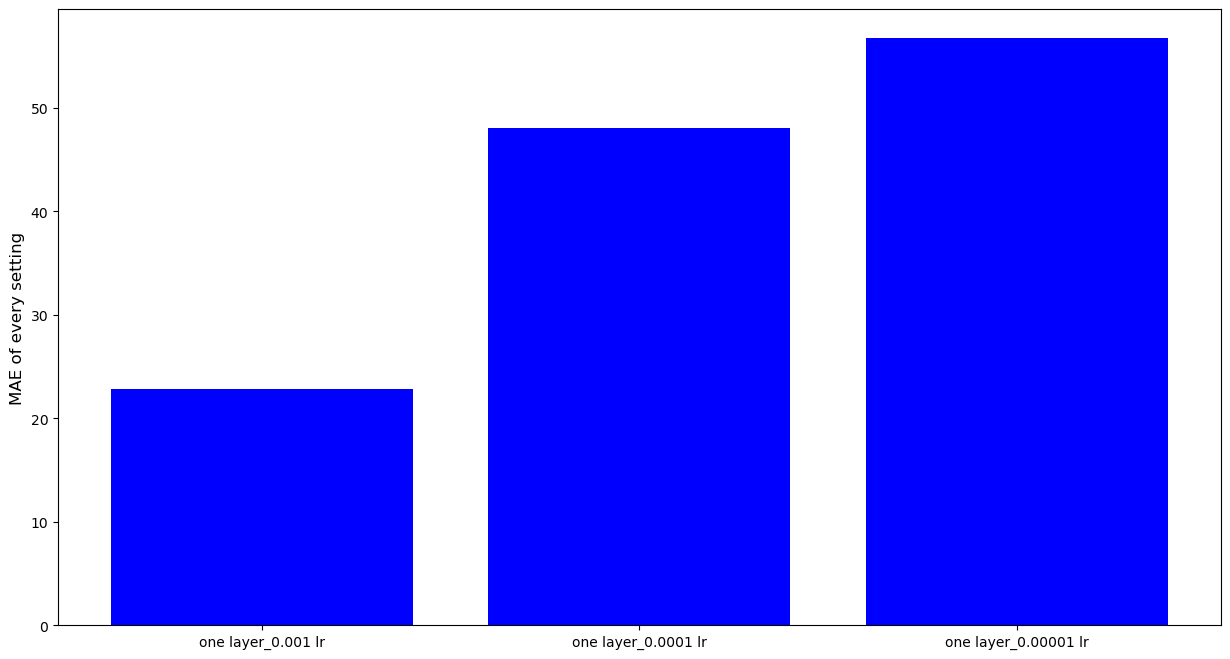

71/71 - 0s - loss: 21.6857 - mean_absolute_error: 21.6857
Restored model best performance, MAE: 21.69


In [71]:
plt.figure(figsize = (15,8))

whole_list = []

lang = ['one layer_0.001 lr', 'one layer_0.0001 lr', 'one layer_0.00001 lr']

for elem in ann:
    whole_list.append(np.mean(elem))   

plt.bar(range(len(whole_list)), whole_list, fc='b', tick_label=lang)

plt.ylabel("MAE of every setting", fontsize="12")

plt.show()

x_train, x_test, y_train, y_test = train_test_split(all_df.iloc[:,1:], all_df['RelapseFreeSurvival (outcome)'], test_size=0.3, random_state=1)

model_one_layer_1.load_weights('./regression_models/fold_5_model_one_layer_1.hdf5')

y_pred=model_one_layer_1.predict(np.array(x_test))

loss, mae = model_one_layer_1.evaluate(np.array(x_test), np.array(y_test), verbose=2)
print("Restored model best performance, MAE: {:5.2f}".format(mae))